<a href="https://colab.research.google.com/github/francisco-roserojaramillo/telecomx-1/blob/main/TelecomX_LATAM_challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracción
### Análisis de Evasión de Clientes en Telecom X
*   **Proyecto:** "Churn de Clientes"
*   **Autor:** Francisco Xavier Rosero Jaramillo
*   **Rol:** Estudiante en Data Science

### Descripción
Para iniciar el análisis, es fundamental importar los datos de la API de Telecom X. Estos datos, en formato JSON, contienen información esencial sobre los clientes, incluyendo datos demográficos, servicios contratados y, lo más importante, el estado de evasión (Churn).

**Objetivos de esta fase:**
*   Cargar los datos directamente desde la API utilizando Python.
*   Convertir los datos a un DataFrame de Pandas para facilitar su manipulación y análisis posterior.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display

# URL del archivo JSON con los datos de los clientes
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar los datos en un DataFrame de pandas
try:
    datos_brutos = pd.read_json(url)
    print("Extracción de datos realizada con éxito.")
    print("Primeras 5 filas de los datos extraídos:")
    display(datos_brutos.head())
except Exception as e:
    print(f"Error al extraer los datos: {e}")

Extracción de datos realizada con éxito.
Primeras 5 filas de los datos extraídos:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformación
### Conociendo y preparando el conjunto de datos

**Descripción:**
Una vez extraídos los datos, el siguiente paso es comprender su estructura y prepararlos para el análisis. Esta etapa es crucial dentro del proceso ETL (Extract, Transform, Load), ya que garantiza la calidad y consistencia de la información.

**Objetivos de esta fase:**
1.  **Explorar y Aplanar la Estructura:** El formato JSON es anidado. Se normalizará para convertirlo en una estructura tabular plana.
2.  **Verificar Tipos de Datos e Inconsistencias:** Se revisarán las columnas para identificar tipos de datos incorrectos, valores nulos, vacíos o inconsistentes.
3.  **Limpieza y Manejo de Inconsistencias:** Se aplicarán las correcciones necesarias para asegurar la integridad del dataset.
4.  **Ingeniería de Características:** Se crearán nuevas columnas que puedan aportar valor al análisis, como el cálculo de cuentas diarias.
5.  **Estandarización de Datos:** Se transformarán datos categóricos (ej. 'Sí'/'No') a un formato numérico (1/0) para facilitar el análisis cuantitativo y la futura implementación de modelos de Machine Learning.

In [ ]:
# Normalizar el JSON anidado en un DataFrame plano
try:
    df_normalizado = pd.json_normalize(datos_brutos.to_dict('records'))
    print("Datos normalizados con éxito. Estructura tabular creada.")
    display(df_normalizado.head())
except Exception as e:
    print(f"Error al normalizar los datos: {e}")

Datos normalizados con éxito. Estructura tabular creada.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Explorar las columnas y tipos de datos
print("Información general del DataFrame:")
df_normalizado.info()

print("\nTipos de datos por columna:")
print(df_normalizado.dtypes)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tech

In [ ]:
# Comprobación de valores únicos para identificar inconsistencias
print("Valores únicos en la columna 'Churn':")
print(df_normalizado['Churn'].unique())

print("\nValores únicos en 'account.Charges.Total':")
# Mostramos los primeros 10 valores únicos para no saturar la salida
print(df_normalizado['account.Charges.Total'].unique()[:10])

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en 'account.Charges.Total':
['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']


In [ ]:
# Manejo de inconsistencias

# 1. Corregir la columna 'account.Charges.Total'
# Se identificaron valores ' ' (espacios) que deben ser tratados como nulos y luego convertidos a numéricos.
# Usamos 'coerce' para forzar los errores a NaN (Not a Number)
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Los valores NaN corresponden a clientes con tenure = 0. Se asume que su gasto total es 0.
df_normalizado['account.Charges.Total'].fillna(0, inplace=True)
print("Columna 'account.Charges.Total' limpiada y convertida a tipo numérico.")

# 2. Manejar valores vacíos en 'Churn'
# Se eliminan las filas donde 'Churn' es una cadena vacía, ya que no aportan información sobre la evasión.
df_limpio = df_normalizado[df_normalizado['Churn'] != ''].copy()
print(f"Se eliminaron {len(df_normalizado) - len(df_limpio)} filas con valores vacíos en la columna 'Churn'.")

# Verificamos que los cambios se aplicaron correctamente
print("\nValores únicos en 'Churn' después de la limpieza:", df_limpio['Churn'].unique())
print("Cantidad de valores nulos en 'account.Charges.Total' después de la limpieza:", df_limpio['account.Charges.Total'].isnull().sum())

Columna 'account.Charges.Total' limpiada y convertida a tipo numérico.
Se eliminaron 224 filas con valores vacíos en la columna 'Churn'.

Valores únicos en 'Churn' después de la limpieza: ['No' 'Yes']
Cantidad de valores nulos en 'account.Charges.Total' después de la limpieza: 0


/tmp/ipython-input-2248145259.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# Creación de la columna 'Cuentas_Diarias'
# Se asume un mes de 30 días para el cálculo.
df_limpio['Cuentas_Diarias'] = round(df_limpio['account.Charges.Monthly'] / 30, 2)

print("Columna 'Cuentas_Diarias' creada con éxito.")
display(df_limpio[['customerID', 'account.Charges.Monthly', 'Cuentas_Diarias']].head())

Columna 'Cuentas_Diarias' creada con éxito.


,customerID,account.Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.19
1,0003-MKNFE,59.9,2.00
2,0004-TLHLJ,73.9,2.46
3,0011-IGKFF,98.0,3.27
4,0013-EXCHZ,83.9,2.80


In [ ]:
# Estandarización y transformación de datos

# Renombrar columnas para facilitar el acceso
df_limpio.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'Charges_Monthly',
    'account.Charges.Total': 'Charges_Total'
}, inplace=True)

# Convertir columnas binarias (Sí/No) a formato numérico (1/0)
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in columnas_binarias:
    df_limpio[col] = df_limpio[col].apply(lambda x: 1 if x == 'Yes' else 0)

print("Columnas renombradas y datos binarios estandarizados a 1 y 0.")
display(df_limpio[['customerID', 'Churn', 'Partner', 'Dependents', 'PhoneService']].head())

Columnas renombradas y datos binarios estandarizados a 1 y 0.


,customerID,Churn,Partner,Dependents,PhoneService
0,0002-ORFBO,0,1,1,1
1,0003-MKNFE,0,0,0,1
2,0004-TLHLJ,1,0,0,1
3,0011-IGKFF,1,1,0,1
4,0013-EXCHZ,1,1,0,1


# 📊 Carga y Análisis
### Análisis Exploratorio de Datos (EDA)

**Descripción:**
Con un conjunto de datos limpio y bien estructurado, esta fase se centra en explorar y visualizar la información para descubrir patrones, anomalías y relaciones entre las variables que puedan explicar la evasión de clientes.

**Objetivos de esta fase:**
1.  **Análisis Descriptivo:** Calcular métricas estadísticas fundamentales para entender las características generales de los datos.
2.  **Distribución de la Evasión:** Visualizar la proporción de clientes que han cancelado el servicio frente a los que no.
3.  **Análisis por Variables Categóricas:** Investigar cómo la evasión se comporta en diferentes segmentos de clientes (género, tipo de contrato, método de pago, etc.).
4.  **Análisis por Variables Numéricas:** Analizar la relación entre la evasión y variables como la antigüedad del cliente (`tenure`) y los montos de facturación.
5.  **Análisis de Correlación:** Identificar las relaciones más fuertes entre las variables del dataset para comprender qué factores están más asociados con el Churn.

In [ ]:
# Análisis Descriptivo de las variables numéricas
print("Estadísticas descriptivas de las principales variables numéricas:")
display(df_limpio[['tenure', 'Charges_Monthly', 'Charges_Total', 'Cuentas_Diarias']].describe())

Estadísticas descriptivas de las principales variables numéricas:


,tenure,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [ ]:
# Distribución de Evasión (Churn)

# Contar los valores
churn_counts = df_limpio['Churn'].value_counts()
churn_labels = ['No Churn', 'Churn']

# Crear el gráfico de pastel con Plotly
fig = px.pie(
    names=churn_labels,
    values=churn_counts.values,
    title='Distribución de Evasión de Clientes (Churn)',
    color_discrete_sequence=px.colors.sequential.Tealgrn
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Clientes: %{value}<br>Porcentaje: %{percent}<extra></extra>'
)

fig.update_layout(
    title_font_size=22,
    font=dict(family="Arial, sans-serif", size=14)
)

fig.show()

In [ ]:
# Recuento de evasión por variables categóricas
def plot_churn_by_category(column, title):
    # Agrupar por la columna y el churn, y contar
    grouped_data = df_limpio.groupby([column, 'Churn']).size().reset_index(name='count')

    # Mapear 0 y 1 a 'No' y 'Sí' para la leyenda
    grouped_data['Churn'] = grouped_data['Churn'].map({0: 'No', 1: 'Sí'})

    # Crear el gráfico de barras con Plotly
    fig = px.bar(
        grouped_data,
        x=column,
        y='count',
        color='Churn',
        title=title,
        barmode='group',
        labels={'count': 'Número de Clientes', column: column},
        color_discrete_map={'No': '#2E8B57', 'Sí': '#DC143C'}
    )

    fig.update_layout(
        xaxis_title=None,
        yaxis_title='Número de Clientes',
        title_font_size=20,
        font=dict(family="Arial, sans-serif", size=12),
        legend_title='Churn'
    )

    fig.show()

# Lista de columnas categóricas para analizar
categorical_columns = [
    'Contract', 'PaymentMethod', 'InternetService',
    'OnlineSecurity', 'TechSupport', 'gender', 'SeniorCitizen'
]

# Títulos para cada gráfico
titles = {
    'Contract': 'Evasión de Clientes por Tipo de Contrato',
    'PaymentMethod': 'Evasión de Clientes por Método de Pago',
    'InternetService': 'Evasión de Clientes por Tipo de Servicio de Internet',
    'OnlineSecurity': 'Evasión por Contratación de Seguridad Online',
    'TechSupport': 'Evasión por Contratación de Soporte Técnico',
    'gender': 'Evasión de Clientes por Género',
    'SeniorCitizen': 'Evasión de Clientes por Tercera Edad'
}

for col in categorical_columns:
    plot_churn_by_category(col, titles.get(col, f'Evasión de Clientes por {col}'))

In [ ]:
# Conteo de evasión por variables numéricas (visualización con histogramas)

def plot_churn_by_numeric(column, title):
    df_limpio['Churn_Label'] = df_limpio['Churn'].map({0: 'No', 1: 'Sí'})

    fig = px.histogram(
        df_limpio,
        x=column,
        color='Churn_Label',
        marginal='box', # Agrega un box plot en el margen
        title=title,
        labels={column: column.replace('_', ' ')},
        color_discrete_map={'No': '#2E8B57', 'Sí': '#DC143C'}
    )

    fig.update_layout(
        barmode='overlay',
        xaxis_title=column.replace('_', ' '),
        yaxis_title='Número de Clientes',
        title_font_size=20,
        font=dict(family="Arial, sans-serif", size=12),
        legend_title='Churn'
    )
    fig.update_traces(opacity=0.75)
    fig.show()

# Columnas numéricas para analizar
numeric_columns = ['tenure', 'Charges_Monthly', 'Cuentas_Diarias']

titles_numeric = {
    'tenure': 'Distribución de Antigüedad (Meses) por Evasión',
    'Charges_Monthly': 'Distribución de Cargos Mensuales por Evasión',
    'Cuentas_Diarias': 'Distribución de Cuentas Diarias por Evasión'
}

for col in numeric_columns:
    plot_churn_by_numeric(col, titles_numeric.get(col))

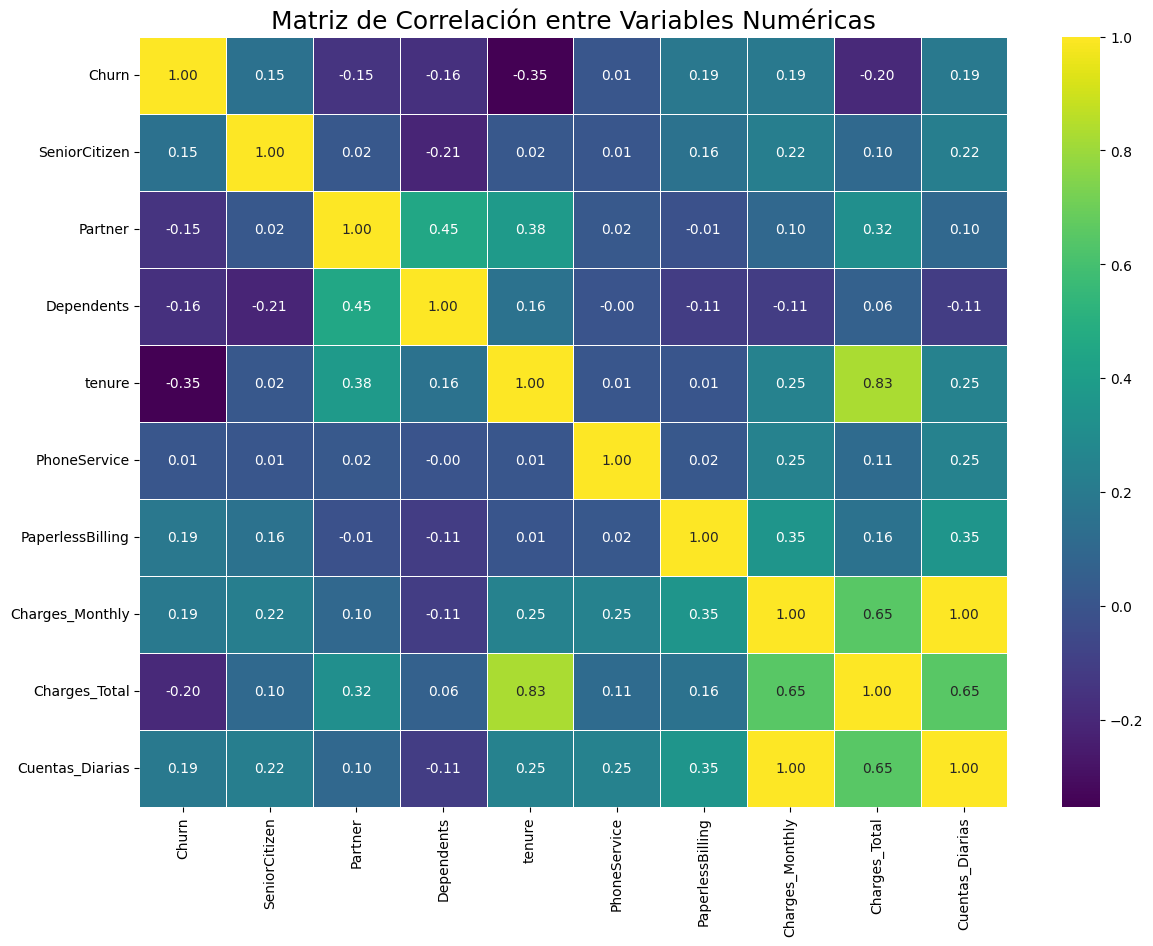


Correlación de las variables con 'Churn':


,Churn
Churn,1.000000
Cuentas_Diarias,0.193412
Charges_Monthly,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PhoneService,0.011942
Partner,-0.150448
Dependents,-0.164221
Charges_Total,-0.198324
tenure,-0.352229


In [ ]:
# Análisis de correlación entre variables numéricas y el Churn

# Seleccionar solo las columnas numéricas para el análisis de correlación
df_corr = df_limpio.select_dtypes(include=['int64', 'float64', 'int32'])

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=18)
plt.show()

# Mostrar la correlación específica con la variable 'Churn'
print("\nCorrelación de las variables con 'Churn':")
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
display(churn_correlation)

# 📄 Informe Final
### Resumen del Proyecto "Churn de Clientes" para Telecom X

**Preparado por:** Francisco Xavier Rosero Jaramillo - Estudiante en Data Science

### **1. Introducción**
El presente informe detalla el Análisis Exploratorio de Datos (EDA) realizado sobre el conjunto de datos de clientes de Telecom X. El objetivo principal de este proyecto es identificar los factores clave que influyen en la **evasión de clientes (Churn)**, con el fin de proporcionar insights estratégicos que permitan a la empresa desarrollar acciones de retención efectivas. La alta tasa de cancelación representa un desafío significativo, y este análisis es el primer paso para abordarlo con un enfoque basado en datos.

### **2. Limpieza y Tratamiento de Datos**
El proceso comenzó con la **extracción de datos** desde la API proporcionada, que se encontraban en un formato JSON anidado. Para facilitar su manipulación, los datos fueron transformados en un DataFrame tabular de Pandas.

Durante la fase de transformación, se llevaron a cabo los siguientes pasos de limpieza y preparación:
*   **Aplanamiento de Datos:** La estructura JSON anidada fue normalizada para crear un formato de tabla simple y accesible.
*   **Corrección de Tipos de Datos:** La columna de cargos totales (`Charges.Total`) fue convertida a un formato numérico, manejando los valores vacíos correspondientes a clientes nuevos, a los que se les asignó un valor de 0.
*   **Manejo de Datos Faltantes:** Se eliminaron las filas que no contenían información en la columna `Churn`, ya que no aportaban valor para el objetivo del análisis.
*   **Estandarización de Variables:** Columnas con respuestas binarias (ej. 'Sí'/'No') fueron convertidas a un formato numérico (1/0) para posibilitar análisis cuantitativos, como el cálculo de correlaciones.
*   **Ingeniería de Características:** Se creó la columna `Cuentas_Diarias` a partir de los cargos mensuales para obtener una perspectiva más detallada del gasto del cliente.

### **3. Análisis Exploratorio de Datos (EDA)**
El análisis reveló patrones y tendencias clave relacionados con la evasión de clientes. A continuación, se presentan los hallazgos más relevantes:

**a. Tasa de Evasión General:**
El análisis inicial mostró que el **26.5%** de los clientes en la base de datos han cancelado sus servicios. Esta cifra subraya la importancia de implementar estrategias de retención.

**b. Impacto del Tipo de Contrato:**
El **tipo de contrato** es uno de los predictores más fuertes del Churn. Los clientes con contratos **mes a mes** tienen una tasa de cancelación masivamente superior a la de aquellos con contratos de uno o dos años. La flexibilidad de este tipo de contrato facilita la salida de los clientes.

**c. Relevancia de los Servicios Adicionales:**
Se observó una clara tendencia: los clientes que **no contratan servicios de soporte adicionales**, como `Seguridad Online` y `Soporte Técnico`, son significativamente más propensos a cancelar. Estos servicios no solo representan una fuente de ingresos, sino que también actúan como un factor de retención, integrando más al cliente en el ecosistema de la empresa.

**d. Perfil Demográfico y Antigüedad:**
*   La **antigüedad (`tenure`)** es inversamente proporcional al Churn. La mayoría de las cancelaciones ocurren en los primeros meses de servicio. Los clientes que superan el primer año tienden a ser más leales.
*   Los **cargos mensuales** también muestran una correlación positiva con la evasión. Los clientes que pagan tarifas más altas (entre $70 y $100) son más propensos a abandonar, posiblemente por una percepción de un menor costo-beneficio.
*   Aunque variables como el género no muestran una diferencia significativa, los clientes **Senior** tienen una ligera mayor tendencia a la evasión.

**e. Método de Pago:**
El método de pago por **cheque electrónico** está asociado con la tasa de Churn más alta. Esto podría indicar una experiencia de pago con fricciones o ser característico de clientes menos comprometidos y con contratos a corto plazo.

### **4. Conclusiones e Insights Clave**
1.  **El Compromiso es Clave:** La falta de un contrato a largo plazo (mes a mes) es el principal factor de riesgo para la evasión de clientes.
2.  **Los Clientes Nuevos son los más Vulnerables:** La mayor parte del Churn se concentra en los primeros meses de servicio, lo que destaca la importancia de una experiencia de onboarding positiva.
3.  **Los Servicios Adicionales Generan "Lealtad":** Clientes que contratan servicios de protección y soporte técnico demuestran un mayor compromiso y una menor tasa de cancelación.
4.  **El Precio Importa, Especialmente en Planes Premium:** Los clientes con cargos mensuales elevados, particularmente en servicios de Fibra Óptica, son un segmento de alto riesgo que requiere atención especial.

### **5. Recomendaciones Estratégicas**
Basado en los hallazgos de este análisis, recomiendo a Telecom X enfocar sus esfuerzos en las siguientes áreas:

*   **Crear Incentivos para Contratos a Largo Plazo:** Diseñar campañas y ofertas especiales para motivar a los clientes de planes mes a mes a migrar a contratos anuales o bianuales, ofreciendo descuentos o beneficios exclusivos.
*   **Implementar un Programa de Onboarding y Seguimiento:** Desarrollar un programa de bienvenida para nuevos clientes durante sus primeros 3 meses, ofreciendo soporte proactivo para asegurar una experiencia positiva y resolver cualquier problema inicial.
*   **Promocionar Paquetes de Servicios de Valor Agregado:** Crear paquetes que incluyan servicios de seguridad y soporte técnico a un precio atractivo. Comunicar activamente los beneficios de estos servicios como un diferenciador clave frente a la competencia.
*   **Revisar la Estrategia de Precios para Clientes de Fibra Óptica:** Realizar un análisis de competitividad y encuestas de satisfacción para entender por qué este segmento tiene una alta tasa de evasión y ajustar la oferta si es necesario para mejorar la percepción de valor.